### Scikit-learn
##### Iris 분류 - 결정 트리(Decision Tree)

- 1.데이터 탐색

In [112]:
import sklearn
sklearn.__version__

'1.2.2'

In [113]:
from sklearn.datasets import load_iris
iris = load_iris()

In [114]:
# iris 데이터를 액세스 하는 방법
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [115]:
# iris['target_names']로 사용할 수 있지만 아래와 같이 사용을 함
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [116]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [117]:
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [118]:
iris.data.shape, type(iris.data)

((150, 4), numpy.ndarray)

In [119]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [120]:
import pandas as pd

In [121]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['species'] = iris.target

In [122]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [123]:
# y 값 분포
df.species.value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [124]:
# 데이터셋에 대한 설명
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [125]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


- 2. 학습과 테스트 데이터로 분리

In [126]:
from sklearn.model_selection import train_test_split
# 학습 데이터와 테스트 데이터 비율은 3:1 (0.25)
# 대문자 X의 의미는 다차원(2차원), 소문자 y의 의미는 1차원
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=2023
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((112, 4), (38, 4), (112,), (38,))

In [127]:
# y 값의 분포
import numpy as np
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([34, 37, 41], dtype=int64))

In [128]:
# y 값의 분포를 균일하게 37,37,38로 변경
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=2023,
    stratify=iris.target                                # y 값의 분포를 균일하게
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([37, 37, 38], dtype=int64))

In [129]:
# 학습데이터와 테스트 데이터의 비율(Test_size)을 변경하기
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=2023,
    stratify=iris.target,
    test_size=0.2               #학습 데이터 : 테스트 데이터 = 4:1
)                          
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

- 3. 학습(훈련, Train)

In [130]:
# 결정 트리 모델
from sklearn.tree import DecisionTreeClassifier

In [131]:
# 객체 생성(모델 생성)
dtc = DecisionTreeClassifier(random_state=2023)

In [132]:
# 하이퍼 파라메터
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2023,
 'splitter': 'best'}

In [133]:
# 학습(훈련) 실행
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2023)

- 4. 예측(prediction)

In [134]:
# 예측을 하는 경우에는 X 값만준다.
pred = dtc.predict(X_test)

In [135]:
res_df = pd.DataFrame({'y 실제값': y_test, 'y예측값':pred})
res_df.head()

,y 실제값,y예측값
0,2,2
1,0,0
2,1,1
3,1,1
4,0,0


- 5. 평가(Evaluation)

In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9666666666666667

In [137]:
# 4), 5) 과정을 한번에 하기
dtc.score(X_test,y_test)

0.9666666666666667

<Axes: >

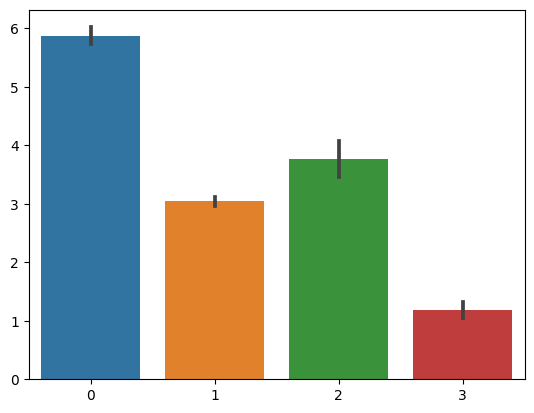